In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
IrisData=pd.read_csv('/kaggle/input/iris/Iris.csv')
print(IrisData.shape)
IrisData.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
IrisData['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
X=IrisData[IrisData.columns[1:5]]
Y=IrisData[IrisData.columns[-1]]
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [6]:
print(Y.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
species_dict={Y.unique()[i]:i for i in range(len(Y.unique()))}
print(species_dict)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [8]:
for species in Y.unique():
    Y[Y==species]=species_dict[species]

print(Y.unique())

[0 1 2]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**EDA**

In [9]:
cols=X.columns

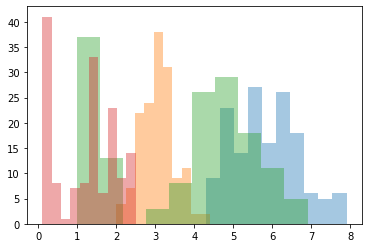

In [10]:
plt.hist(X[cols[0]],alpha=0.4)
plt.hist(X[cols[1]],alpha=0.4)
plt.hist(X[cols[2]],alpha=0.4)
plt.hist(X[cols[3]],alpha=0.4)
plt.show()

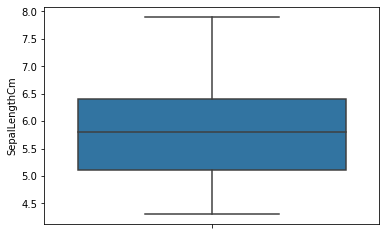

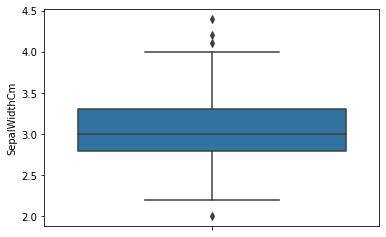

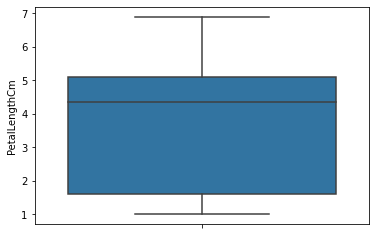

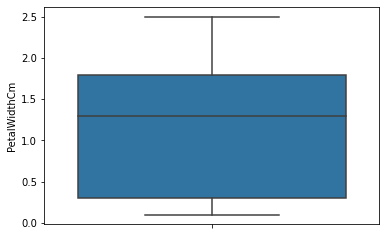

In [11]:
ax1=sns.boxplot(X[cols[0]],orient='v')
plt.show()
ax2=sns.boxplot(X[cols[1]],orient='v')
plt.show()
ax3=sns.boxplot(X[cols[2]],orient='v')
plt.show()
ax4=sns.boxplot(X[cols[3]],orient='v')
plt.show()


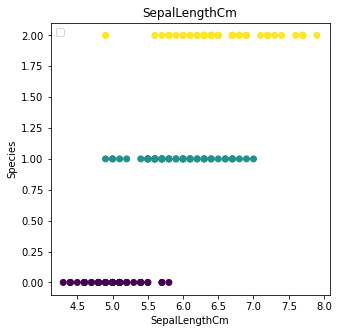

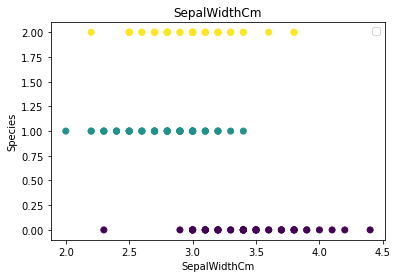

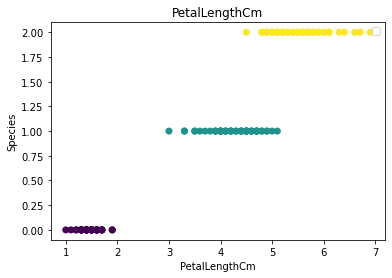

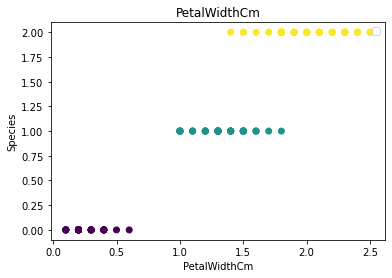

In [12]:

fig=plt.figure(figsize=(5,5))
plt.scatter(X[cols[0]],Y,c=Y)
plt.xlabel(cols[0])
plt.ylabel('Species')
plt.title(cols[0])
plt.legend()
plt.show()
plt.scatter(X[cols[1]],Y,c=Y)
plt.title(cols[1])
plt.xlabel(cols[1])
plt.ylabel('Species')
plt.legend()
plt.show()
plt.scatter(X[cols[2]],Y,c=Y)
plt.title(cols[2])
plt.xlabel(cols[2])
plt.ylabel('Species')
plt.legend()
plt.show()
plt.scatter(X[cols[3]],Y,c=Y)
plt.title(cols[3])
plt.xlabel(cols[3])
plt.ylabel('Species')
plt.legend()
plt.show()

**Train test Split**

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,train_size=0.7,test_size=0.3,random_state=29)

In [15]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


## **Models**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [17]:
param_grid={
            'C':[0.0001,0.0001,0.001,0.01,0.1,1]
}

model=LogisticRegression(random_state=29)

cv=GridSearchCV(model,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy',
                return_train_score=True
               )
cv.fit(X_train,list(Y_train))


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=29), n_jobs=-1,
             param_grid={'C': [0.0001, 0.0001, 0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

In [18]:
cv.best_estimator_

LogisticRegression(C=1, random_state=29)

In [19]:
print('Test Accuracy : ',accuracy_score(list(Y_test),cv.predict(X_test)))

Test Accuracy :  0.9555555555555556


## **Decision Tree**

In [26]:
param_grid={
            'max_depth':[3,5,7,10],
            'min_samples_split':[2,5,7]
}

model=DecisionTreeClassifier(random_state=29)

cv=GridSearchCV(model,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy',
                return_train_score=True
               )
cv.fit(X_train,list(Y_train))


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=29), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 7]},
             return_train_score=True, scoring='accuracy')

In [27]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=29)

In [28]:
print('Test Accuracy : ',accuracy_score(list(Y_test),cv.predict(X_test)))

Test Accuracy :  0.9555555555555556
